In [ ]:
#Решение задания №2. Вывод в самом конце.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
from datetime import date

In [3]:
from datetime import date
from datetime import time
from datetime import datetime

In [4]:
test = pd.read_csv('C:\\Users\\ddemidova\\Desktop\\test\\analyst_test_transactions_db.csv', sep = ',', parse_dates = ['reg_date', 'transaction_date'])

In [5]:
print(test)
#Assumption - новые юзеры, это те, кто совершил первую транзакцию в июле.Тк в данных встречаются несколько reg_date
#для одного user_id, т.е по reg_date невозможно установить пользователь пришел в июле или нет.
#В задаче будем считать, что купон на следующую покупку высылался каждому пользователю, 
#кто провел свою первую транзакцию в июле. Сделаем когортный анализ, чтобы определить retention для разных групп пользователей. 
#Визуализируем с помощью тепловой карты.При обработке данных были удалены из базы строки с отрицательными показателями.

       user_id  order_id   reg_date transaction_date  revenue
0        57562   94545.0 2013-12-22       2015-07-16     1088
1        40047   81824.0 2013-11-24       2015-01-19     1027
2        48153  144851.0 2015-07-03       2015-10-29      601
3        54591  116111.0 2013-07-12       2015-04-30      881
4        39789  134943.0 2013-05-25       2015-07-21      984
...        ...       ...        ...              ...      ...
76852    36921  163682.0 2015-01-15       2015-03-28     1095
76853    31360  145146.0 2015-01-04       2015-08-09      547
76854    56195    8929.0 2012-09-18       2015-11-12      850
76855    46362   78673.0 2015-02-20       2015-07-21      356
76856    14872  106067.0 2015-03-13       2015-04-13     1114

[76857 rows x 5 columns]


In [8]:
#удаляем отрицательные значения
test = test[(test[['user_id','order_id','revenue']]>=0).all(axis=1)]
#test.to_excel('C:\\Users\\ddemidova\\Desktop\\test\\datatest2.xlsx')

In [9]:
def get_date_int(df, column): 
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [10]:
def get_month(x): return datetime(x.year, x.month, 1) 

In [11]:
#выделяем месяц, в котором была произведена транзакция
test['Month'] = test['transaction_date'].apply(get_month)
print(test)
#test.to_excel('C:\\Users\\ddemidova\\Desktop\\test\\datatest2.xlsx')

       user_id  order_id   reg_date transaction_date  revenue      Month
0        57562   94545.0 2013-12-22       2015-07-16     1088 2015-07-01
1        40047   81824.0 2013-11-24       2015-01-19     1027 2015-01-01
2        48153  144851.0 2015-07-03       2015-10-29      601 2015-10-01
3        54591  116111.0 2013-07-12       2015-04-30      881 2015-04-01
4        39789  134943.0 2013-05-25       2015-07-21      984 2015-07-01
...        ...       ...        ...              ...      ...        ...
76852    36921  163682.0 2015-01-15       2015-03-28     1095 2015-03-01
76853    31360  145146.0 2015-01-04       2015-08-09      547 2015-08-01
76854    56195    8929.0 2012-09-18       2015-11-12      850 2015-11-01
76855    46362   78673.0 2015-02-20       2015-07-21      356 2015-07-01
76856    14872  106067.0 2015-03-13       2015-04-13     1114 2015-04-01

[74180 rows x 6 columns]


In [12]:
grouping = test.groupby('user_id')['Month']

In [13]:
#выделяем месяц (CohortMonth), в котором пользователь совершил первую покупку 
test['CohortMonth'] = grouping.transform('min')
print(test)
#test.to_excel('C:\\Users\\ddemidova\\Desktop\\test\\datatest2.xlsx')

       user_id  order_id   reg_date transaction_date  revenue      Month  \
0        57562   94545.0 2013-12-22       2015-07-16     1088 2015-07-01   
1        40047   81824.0 2013-11-24       2015-01-19     1027 2015-01-01   
2        48153  144851.0 2015-07-03       2015-10-29      601 2015-10-01   
3        54591  116111.0 2013-07-12       2015-04-30      881 2015-04-01   
4        39789  134943.0 2013-05-25       2015-07-21      984 2015-07-01   
...        ...       ...        ...              ...      ...        ...   
76852    36921  163682.0 2015-01-15       2015-03-28     1095 2015-03-01   
76853    31360  145146.0 2015-01-04       2015-08-09      547 2015-08-01   
76854    56195    8929.0 2012-09-18       2015-11-12      850 2015-11-01   
76855    46362   78673.0 2015-02-20       2015-07-21      356 2015-07-01   
76856    14872  106067.0 2015-03-13       2015-04-13     1114 2015-04-01   

      CohortMonth  
0      2015-07-01  
1      2015-01-01  
2      2015-10-01  
3      

In [28]:
#Присваиваем индекс каждой строке, индекс показывает, в каком месяце после первой покупки была произведена транзакция. 
#Если CohortIndex = 1, значит в этом месяце пользователь совершил первую транзакцию.
_ ,check_in_month, _ = get_date_int(test, 'Month')
_ , cohort_month, _ = get_date_int(test, 'CohortMonth')
months_diff = check_in_month - cohort_month
test['CohortIndex'] = months_diff + 1
print(test) 

       user_id  order_id   reg_date transaction_date  revenue      Month  \
0        57562   94545.0 2013-12-22       2015-07-16     1088 2015-07-01   
1        40047   81824.0 2013-11-24       2015-01-19     1027 2015-01-01   
2        48153  144851.0 2015-07-03       2015-10-29      601 2015-10-01   
3        54591  116111.0 2013-07-12       2015-04-30      881 2015-04-01   
4        39789  134943.0 2013-05-25       2015-07-21      984 2015-07-01   
...        ...       ...        ...              ...      ...        ...   
76852    36921  163682.0 2015-01-15       2015-03-28     1095 2015-03-01   
76853    31360  145146.0 2015-01-04       2015-08-09      547 2015-08-01   
76854    56195    8929.0 2012-09-18       2015-11-12      850 2015-11-01   
76855    46362   78673.0 2015-02-20       2015-07-21      356 2015-07-01   
76856    14872  106067.0 2015-03-13       2015-04-13     1114 2015-04-01   

      CohortMonth  CohortIndex  
0      2015-07-01            1  
1      2015-01-01    

In [19]:
#строим сводную таблицу с когортным анализом, которая показывает в первом столбце (CohortIndex = 1) 
#число пользователей, которые пришли в месяце CohortMonth, и сколько из пришедших в этом месяце пользователей совершили 
#транзакцию в следующем (CohortIndex = 2), через два месяца (CohortIndex = 3) и т.д.
grouping = test.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='user_id')
print(cohort_counts)

CohortIndex      1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                   
2015-01-01   3827.0  268.0  295.0  321.0  314.0  327.0  370.0  429.0  418.0   
2015-02-01   4331.0  352.0  314.0  337.0  395.0  388.0  494.0  481.0  591.0   
2015-03-01   4781.0  354.0  357.0  388.0  453.0  514.0  487.0  612.0  476.0   
2015-04-01   4663.0  391.0  370.0  429.0  491.0  466.0  603.0  490.0    NaN   
2015-05-01   4451.0  387.0  422.0  517.0  430.0  556.0  434.0    NaN    NaN   
2015-06-01   4422.0  392.0  422.0  448.0  509.0  409.0    NaN    NaN    NaN   
2015-07-01   4451.0  441.0  444.0  539.0  415.0    NaN    NaN    NaN    NaN   
2015-08-01   4547.0  476.0  569.0  407.0    NaN    NaN    NaN    NaN    NaN   
2015-09-01   4057.0  470.0  355.0    NaN    NaN    NaN    NaN    NaN    NaN   
2015-10-01   4492.0  409.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-11-01   2906.0    NaN    NaN    NaN    NaN    N

In [20]:
#генерим аналогичную таблицу только с относительными значениями - Customer Retention Rate, %, 
cohort_sizes = cohort_counts.iloc[:,0]
customer_retention = cohort_counts.divide(cohort_sizes, axis=0)
customer_retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11
CohortMonth,,,,,,,,,,,
2015-01-01,100.0,7.0,7.7,8.4,8.2,8.5,9.7,11.2,10.9,12.5,9.6
2015-02-01,100.0,8.1,7.3,7.8,9.1,9.0,11.4,11.1,13.6,8.9,NaN
2015-03-01,100.0,7.4,7.5,8.1,9.5,10.8,10.2,12.8,10.0,NaN,NaN
2015-04-01,100.0,8.4,7.9,9.2,10.5,10.0,12.9,10.5,NaN,NaN,NaN
2015-05-01,100.0,8.7,9.5,11.6,9.7,12.5,9.8,NaN,NaN,NaN,NaN
2015-06-01,100.0,8.9,9.5,10.1,11.5,9.2,NaN,NaN,NaN,NaN,NaN
2015-07-01,100.0,9.9,10.0,12.1,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,100.0,10.5,12.5,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,100.0,11.6,8.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


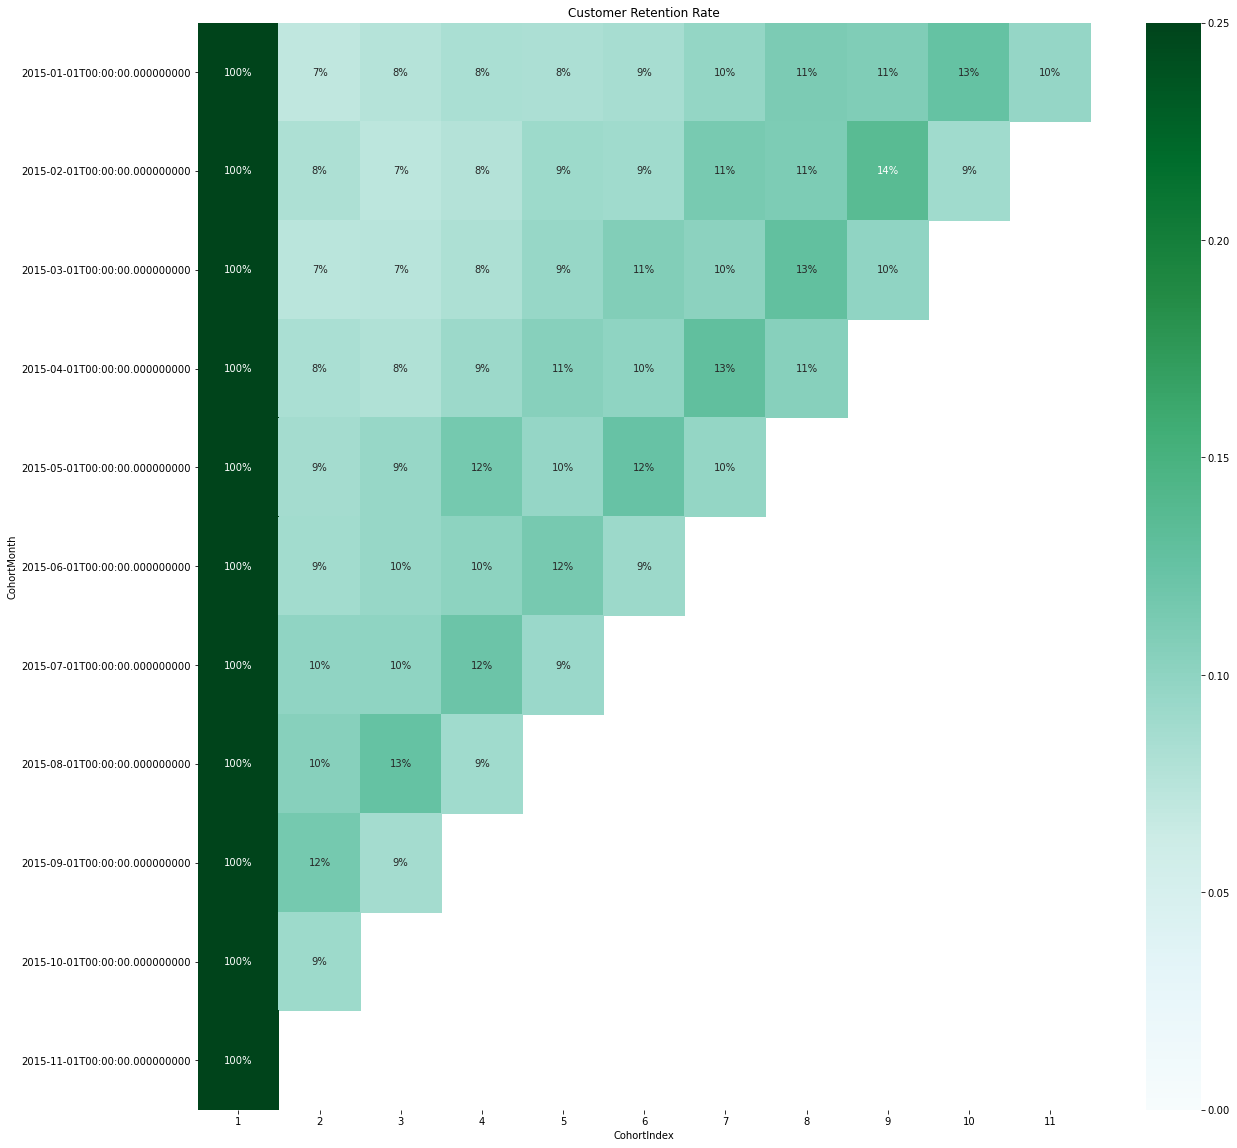

In [21]:
#Визуализируем таблицу с CRR с помощью тепловой карты.
plt.figure(figsize=(20, 20))
plt.title('Customer Retention Rate')
plot = sns.heatmap(data = customer_retention,
           annot = True,
           fmt = '.0%',
           vmin = 0.0,
           vmax = 0.25, 
           cmap = 'BuGn')
fig = plot.get_figure()
fig.savefig('retention_3.png')

In [22]:
#Аналогично рассчитываем таблицу с выручкой, которую принесли клиенты в первом месяце, 
#какую выручку эти же клиенты принесли в следующем месяце и т.д.
grouping = test.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_revenue = grouping['revenue'].sum()
cohort_data_revenue = cohort_data_revenue.reset_index()
cohorts = cohort_data_revenue.pivot(index='CohortMonth', columns='CohortIndex', values='revenue')
print(cohorts)

CohortIndex         1         2         3         4         5         6   \
CohortMonth                                                                
2015-01-01   3953801.0  268670.0  308488.0  341044.0  331841.0  352993.0   
2015-02-01   4477277.0  368760.0  330857.0  345127.0  404334.0  410022.0   
2015-03-01   5011613.0  368232.0  372702.0  417377.0  482066.0  554714.0   
2015-04-01   4856282.0  417135.0  386507.0  458901.0  532203.0  502610.0   
2015-05-01   4640662.0  401899.0  446939.0  539738.0  458595.0  597598.0   
2015-06-01   4641036.0  417807.0  442140.0  491780.0  547114.0  420738.0   
2015-07-01   4646845.0  468437.0  466402.0  576318.0  439060.0       NaN   
2015-08-01   4758475.0  508383.0  607216.0  430921.0       NaN       NaN   
2015-09-01   4303666.0  511166.0  372658.0       NaN       NaN       NaN   
2015-10-01   4788664.0  428191.0       NaN       NaN       NaN       NaN   
2015-11-01   3024914.0       NaN       NaN       NaN       NaN       NaN   

CohortIndex

In [23]:
#Представляем последнюю таблицу с выручкой в относительных значениях - Revenue Retention Rate 
cohort_revenue = cohorts.iloc[:,0]
revenue_retention = cohorts.divide(cohort_revenue, axis=0)
revenue_retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11
CohortMonth,,,,,,,,,,,
2015-01-01,100.0,6.8,7.8,8.6,8.4,8.9,9.9,11.8,11.1,13.2,9.9
2015-02-01,100.0,8.2,7.4,7.7,9.0,9.2,11.7,11.6,14.3,9.3,NaN
2015-03-01,100.0,7.3,7.4,8.3,9.6,11.1,10.2,13.4,10.1,NaN,NaN
2015-04-01,100.0,8.6,8.0,9.4,11.0,10.3,13.3,10.3,NaN,NaN,NaN
2015-05-01,100.0,8.7,9.6,11.6,9.9,12.9,9.9,NaN,NaN,NaN,NaN
2015-06-01,100.0,9.0,9.5,10.6,11.8,9.1,NaN,NaN,NaN,NaN,NaN
2015-07-01,100.0,10.1,10.0,12.4,9.4,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,100.0,10.7,12.8,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,100.0,11.9,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


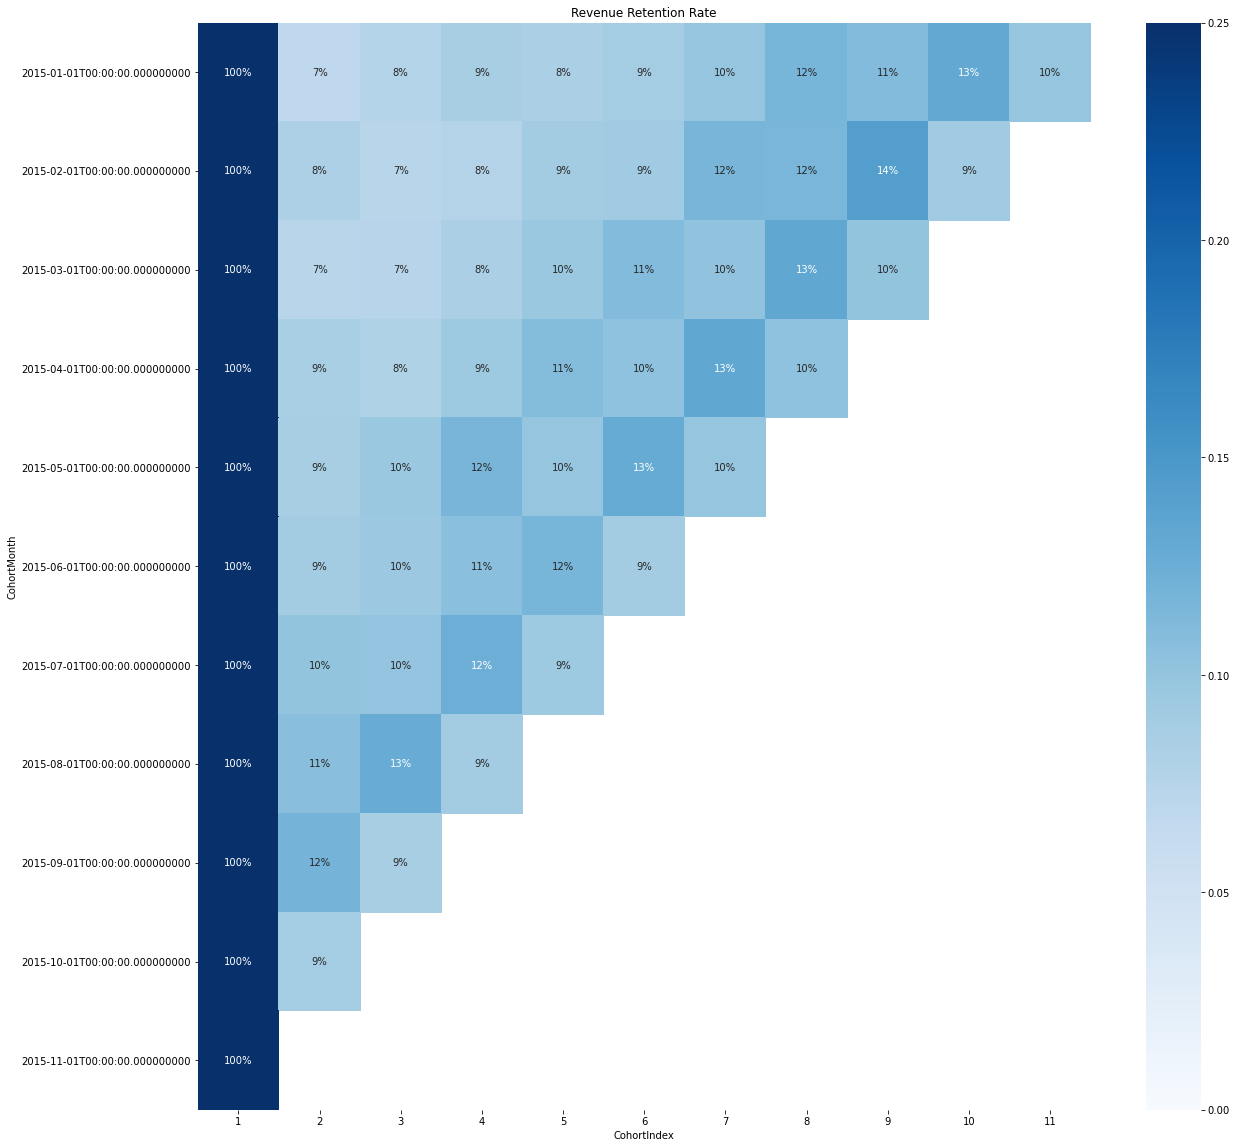

In [24]:
#
plt.figure(figsize=(20, 20))
plt.title('Revenue Retention Rate')
plot = sns.heatmap(data = revenue_retention,
           annot = True,
           fmt = '.0%',
           vmin = 0.0,
           vmax = 0.25, 
           cmap = 'Blues')
fig = plot.get_figure()
fig.savefig('rrr.png')

In [ ]:
#Вывод: CRR и RRR пользователей, которые пришли в июле, вырос на 1-2% в следующем месяце, по сравнению с ретешеном пользоватлей,
#которые пришли в июне, мае и ранее. На горизонте 2 и более месяцев ретешен июльских пользователей не показывает роста.
#Если купон, который высылался пользователям, действовал в течение меясяца, то нам удалось немного поднять Retantion Rate. 
#Так как рост показателя был незначительным, лучше поэкспериментировать с другими акциями и видами купонов. 